In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
!pwd

/cfsshares/prd/wmla/sigs/aaaixusr1/notebooks/aa-jupyter-sig-2-3-1/8ff5ce39-e7c7-4a6e-81e1-b62e40434236/DillardsJupyter-5-4-0-11/config


In [4]:
exam_df = pd.read_csv('/cfsshares/prd/wmla/sigs/aaaixusr1/notebooks/aa-jupyter-sig-2-3-1/8ff5ce39-e7c7-4a6e-81e1-b62e40434236/DillardsJupyter-5-4-0-11/notebooks/Pluralsight/Datasets/exams.csv')

exam_df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
51,female,group C,bachelor's degree,standard,none,92,85,89
63,female,group E,some college,free/reduced,none,62,65,69
72,male,group D,some high school,free/reduced,none,79,75,69
37,female,group C,some high school,standard,none,82,82,83
70,female,group B,some high school,standard,none,48,67,60


In [5]:
exam_df.describe()

,math score,reading score,writing score
count,100.000000,100.000000,100.000000
mean,69.450000,72.610000,71.600000
std,15.415049,14.571936,14.494165
min,32.000000,33.000000,38.000000
25%,57.000000,62.000000,60.750000
50%,67.500000,74.000000,70.000000
75%,82.000000,83.250000,83.000000
max,100.000000,100.000000,100.000000


In [6]:
from sklearn import preprocessing

# Standardize values in order to have 0 mean and variance in order to compare different distributions
exam_df[['math score']] = preprocessing.scale(exam_df[['math score']].astype('float64'))
exam_df[['reading score']] = preprocessing.scale(exam_df[['reading score']].astype('float64'))
exam_df[['writing score']] = preprocessing.scale(exam_df[['writing score']].astype('float64'))

In [7]:
exam_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group D,some college,free/reduced,none,-0.159736,-0.800751,-0.526991
1,female,group D,associate's degree,standard,completed,-0.942118,-0.662809,-0.457650
2,male,group C,associate's degree,standard,completed,-0.094538,-0.248985,-0.318968
3,female,group C,some college,standard,completed,1.079035,0.854548,0.929168
4,male,group A,bachelor's degree,standard,none,-0.290133,-0.869722,-0.804354


In [8]:
exam_df.describe()

,math score,reading score,writing score
count,1.000000e+02,1.000000e+02,1.000000e+02
mean,-2.295386e-16,3.358425e-17,4.496403e-16
std,1.005038e+00,1.005038e+00,1.005038e+00
min,-2.441683e+00,-2.731933e+00,-2.329853e+00
25%,-8.117211e-01,-7.317800e-01,-7.523483e-01
50%,-1.271370e-01,9.586939e-02,-1.109454e-01
75%,8.182410e-01,7.338491e-01,7.904858e-01
max,1.991814e+00,1.889110e+00,1.969280e+00


In [9]:
exam_df['parental level of education'].unique()

array(['some college', "associate's degree", "bachelor's degree",
       'high school', 'some high school', "master's degree"], dtype=object)

In [13]:
# Establishing intrinsic ordering
parental_level_of_education = [
    "some high school",
    "high school",
    "some college",
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]

In [14]:
# Converting to order integer values for ML algorithms
label_encoding = preprocessing.LabelEncoder()

label_encoding = label_encoding.fit(parental_level_of_education)

In [15]:
exam_df['parental level of education'] = \
    label_encoding.transform(exam_df['parental level of education'].astype(str))

In [16]:
exam_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group D,4,free/reduced,none,-0.159736,-0.800751,-0.526991
1,female,group D,0,standard,completed,-0.942118,-0.662809,-0.457650
2,male,group C,0,standard,completed,-0.094538,-0.248985,-0.318968
3,female,group C,4,standard,completed,1.079035,0.854548,0.929168
4,male,group A,1,standard,none,-0.290133,-0.869722,-0.804354


In [17]:
label_encoding.classes_

array(["associate's degree", "bachelor's degree", 'high school',
       "master's degree", 'some college', 'some high school'],
      dtype='<U18')

In [18]:
# Categorical variables with no intrinsic order can be converted to numeric values using one-hot encoding
exam_df = pd.get_dummies(exam_df, columns=['race/ethnicity'])

exam_df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,male,4,free/reduced,none,-0.159736,-0.800751,-0.526991,0,0,0,1,0
1,female,0,standard,completed,-0.942118,-0.662809,-0.457650,0,0,0,1,0
2,male,0,standard,completed,-0.094538,-0.248985,-0.318968,0,0,1,0,0
3,female,4,standard,completed,1.079035,0.854548,0.929168,0,0,1,0,0
4,male,1,standard,none,-0.290133,-0.869722,-0.804354,1,0,0,0,0


In [22]:
exam_df = pd.get_dummies(exam_df, columns=['gender',
                                           'lunch',
                                           'test preparation course'])

exam_df.head()

,parental level of education,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,4,-0.159736,-0.800751,-0.526991,0,0,0,1,0,0,1,1,0,0,1
1,0,-0.942118,-0.662809,-0.457650,0,0,0,1,0,1,0,0,1,1,0
2,0,-0.094538,-0.248985,-0.318968,0,0,1,0,0,0,1,0,1,1,0
3,4,1.079035,0.854548,0.929168,0,0,1,0,0,1,0,0,1,1,0
4,1,-0.290133,-0.869722,-0.804354,1,0,0,0,0,0,1,0,1,0,1


In [23]:
from sklearn.model_selection import train_test_split

X = exam_df.drop('math score', axis = 1)
Y = exam_df['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [24]:
x_train.shape, x_test.shape

((80, 14), (20, 14))

In [25]:
y_train.shape, y_test.shape

((80,), (20,))

In [26]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)
# Since one-hot coding was used for features and setting fit_intercept=True may cause perfect collinearity

In [27]:
print("Training score: ", linear_model.score(x_train, y_train))

Training score:  0.8872868811450164


In [28]:
y_pred = linear_model.predict(x_test)

In [29]:
from sklearn.metrics import r2_score

print("Testing score: ", r2_score(y_test, y_pred))

Testing score:  0.9055691004606615


In [30]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(fit_intercept=False).fit(x_train, y_train)

In [31]:
print("Training score: ", linear_model.score(x_train, y_train))

Training score:  0.8872868811450164


In [32]:
y_pred = linear_model.predict(x_test)

In [33]:
print("Testing score: ", r2_score(y_test, y_pred))

Testing score:  0.9055691004606592


In [35]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})

df_pred_actual.head(10)

,predicted,actual
1,-0.903563,-0.942118
57,-0.285527,-0.290133
97,1.334710,1.079035
75,1.038238,0.883439
80,-1.012366,-1.333309
32,-1.038266,-0.942118
12,-0.814847,-1.007317
89,0.970170,0.883439
67,1.885942,1.991814
64,-1.334576,-0.811721


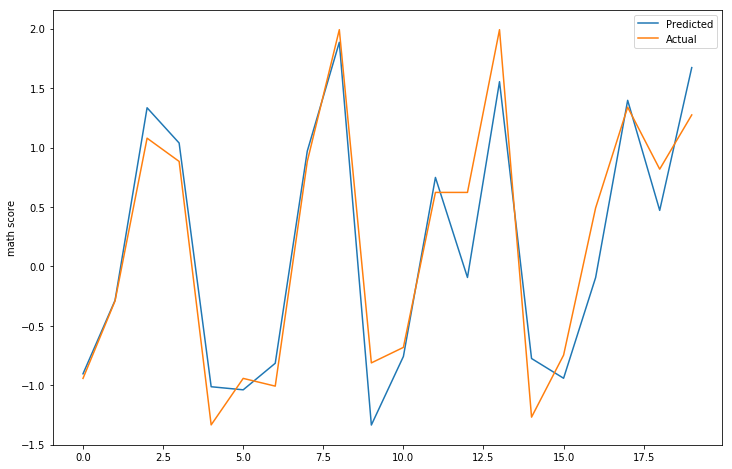

In [36]:
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('math score')

plt.legend()
plt.show()

In [37]:
X = exam_df.drop(['math score', 'writing score', 'reading score'], axis = 1)
Y = exam_df['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)
print("Training score: ", linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)
print("Testing score: ", r2_score(y_test, y_pred))

Training score:  0.2914609501200198
Testing score:  0.21888971606242535


In [39]:
X = exam_df.drop(['math score', 'reading score'], axis = 1)
Y = exam_df['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)
print("Training score: ", linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)
print("Testing score: ", r2_score(y_test, y_pred))

Training score:  0.8930543343299737
Testing score:  0.7610694300409498
